<img src="./images/shouke_logo.png"
     style="float: right"
     width=100
     style="padding-bottom:150px;"/>
<br>
<br>
<br>

<table style="float:center;">
    <tr>
        <td>
            <img src='./images/python-logo.png'width=130>
        </td>
        <td>
            <img src='./images/pandas-logo.png'width=150>
        </td>
        <td>
            <img src='./images/seaborn_logo.png'width=150>
        </td> 
    </tr>
</table>

<h1 style='text-align: center;'>Correlation Analysis and Feature Selection</h1>
<h3 style='text-align: center;'>Shouke Wei, Ph.D. Professor</h3>
<h4 style='text-align: center;'>Email: shouke.wei@gmail.com</h4>

## Objective
- learn how to select variables for linear regression model through correlation analysis 

Correlation analysis is a bivariate analysis, which measures   
- the strength of association between two variables and   
- the direction of the relationship.

In [8]:
# import required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read data
df = pd.read_csv('./data/gdp_china_outlier_cl.csv')

# display the first 5 rows
df.head()

,prov,gdpr,year,gdp,pop,finv,trade,fexpen,uinc
0,Guangdong,First,2000,1.074125,8.650000,0.314513,1.408147,0.108032,0.976157
1,Guangdong,First,2001,1.203925,8.733000,0.348443,1.501391,0.132133,1.041519
2,Guangdong,First,2002,1.350242,8.842000,0.385078,1.830169,0.152108,1.113720
3,Guangdong,First,2003,1.584464,8.963000,0.481320,2.346735,0.169563,1.238043
4,Guangdong,First,2004,1.886462,9.052298,0.587002,2.955899,0.185295,1.362765


## 1. Visualize correlation using matrix scatterplot
 - a great method to roughly determine if there is a linear correlation between multiple variables

<Figure size 1080x504 with 0 Axes>

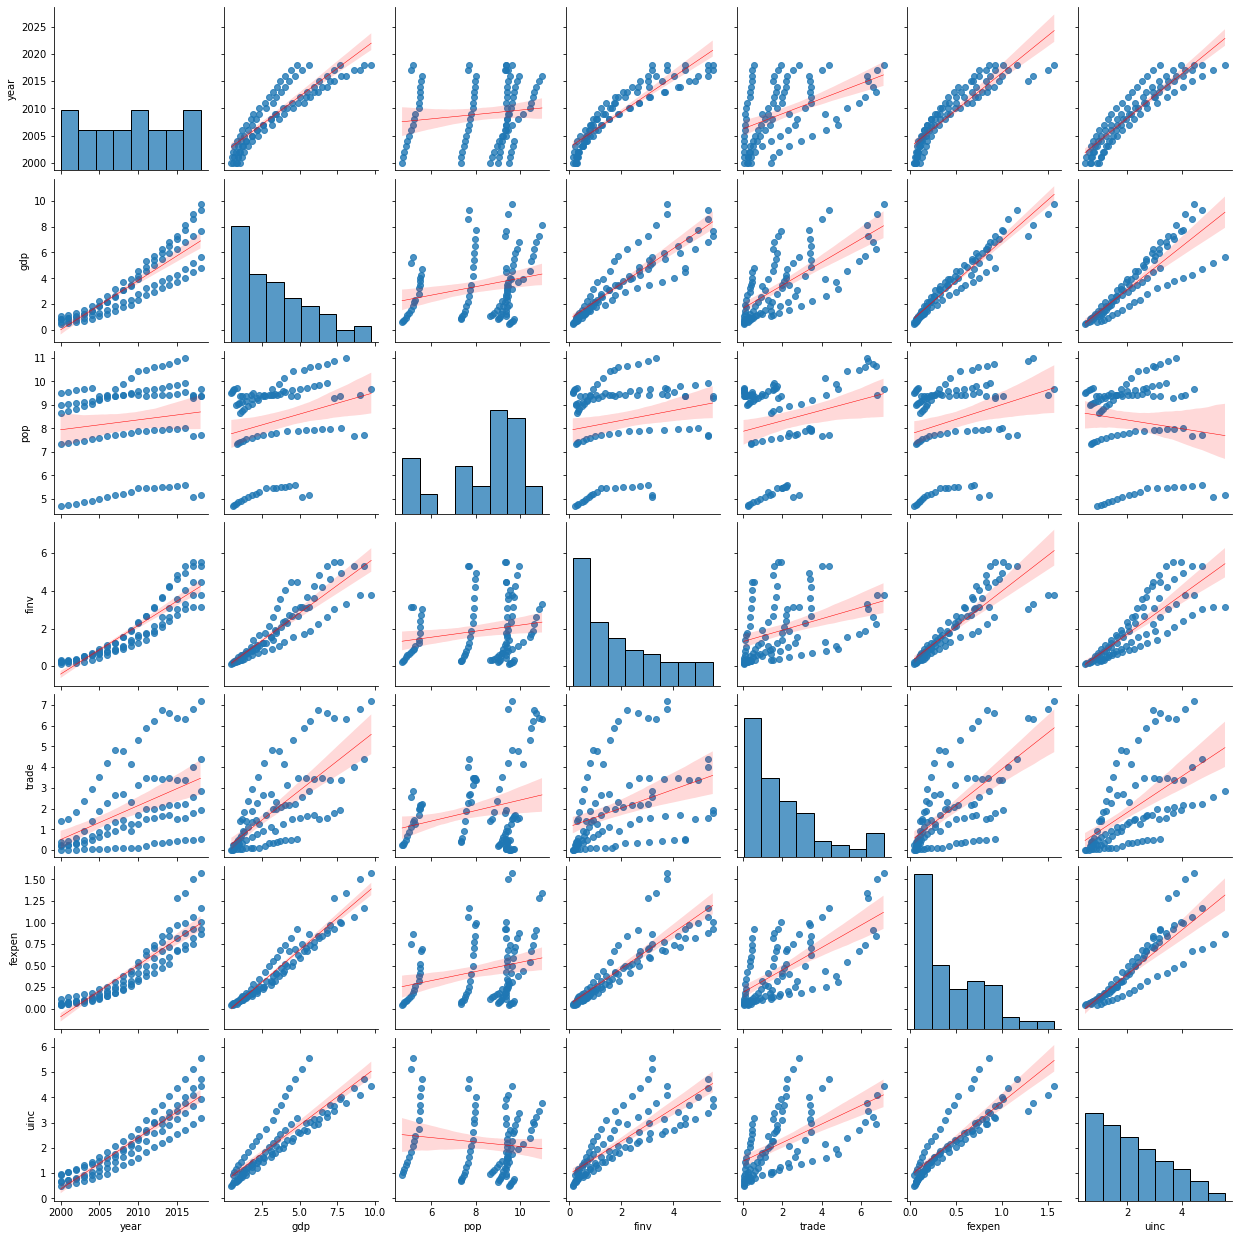

In [10]:
# matrix scatterplot with regression lines
plt.figure(figsize=(15,7))

matrix_scatter = sns.pairplot(data=df,kind='reg',
                             plot_kws={'line_kws':{'color':'red','lw':0.5}})

<Figure size 1080x504 with 0 Axes>

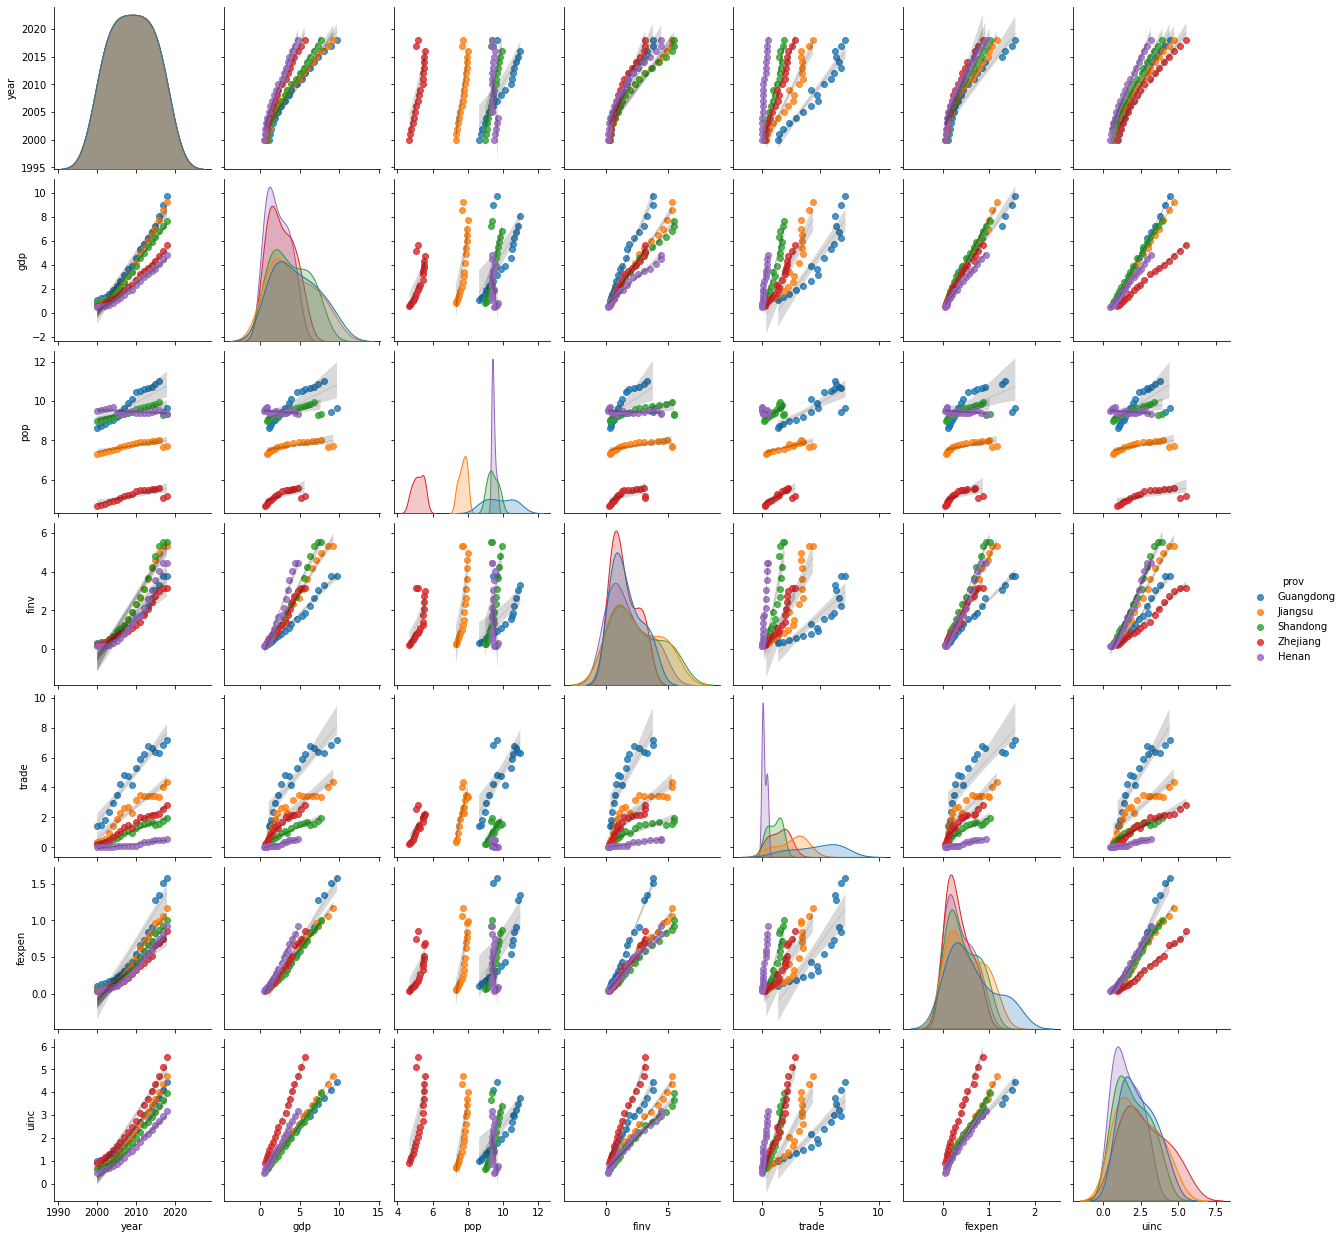

In [11]:
# matrix scatterplot with regression lines for each provinces

plt.figure(figsize=(15,7))

matrix_scatter = sns.pairplot(data=df,hue='prov',kind='reg',
                             plot_kws={'line_kws':{'color':'black','lw':0.1}})

In [12]:
# save the scatterplot
matrix_scatter.savefig('./results/matrix_scatterplot.png',dpi=300)

## 2. Correlation coefficient

Pandas `dataframe.corr()` is used to find the pairwise correlation of all columns in the dataframe. Any `na` values are automatically excluded, and any `non-numeric` data type columns in the dataframe are ignored.

In [13]:
corr = df.corr()
corr

,year,gdp,pop,finv,trade,fexpen,uinc
year,1.000000,0.888484,0.129927,0.914602,0.475826,0.904711,0.918817
gdp,0.888484,1.000000,0.246513,0.896596,0.713338,0.969129,0.872392
pop,0.129927,0.246513,1.000000,0.183929,0.237565,0.257292,-0.128331
finv,0.914602,0.896596,0.183929,1.000000,0.367408,0.884774,0.827754
trade,0.475826,0.713338,0.237565,0.367408,1.000000,0.670646,0.567929
fexpen,0.904711,0.969129,0.257292,0.884774,0.670646,1.000000,0.868094
uinc,0.918817,0.872392,-0.128331,0.827754,0.567929,0.868094,1.000000


- `method ='pearson'`:  standard correlation coefficient, default method
- `method ='kendall'`:Kendall Tau rank correlation coefficient
- `method ='spearman'`: Spearman rank correlation coefficient

## 3. Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

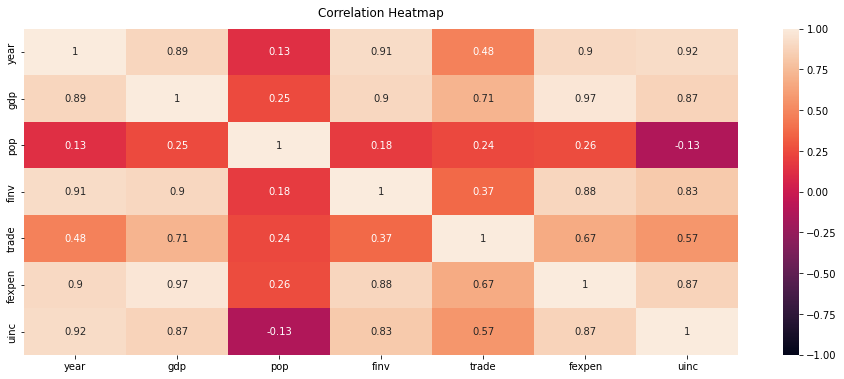

In [15]:
# Increase the size of the heatmap.
plt.figure(figsize=(16,6))
# Store heatmap object in a variable to easily access it 
# Set the range of values to be displayed on the colormap from -1 to 1, and 
# set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(corr,vmin=-1,vmax=1,annot=True)

# Give a title to the heatmap. 
# Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap',fontdict={'fontsize':12},pad=12)

<p style="text-align:center;">Table: Interpreting of correlation coefficient (Hinkle et al., 2003)</p> 

|Correlation  coefficient   |Interpretation|
|:--------------------------|:-------------|
|0.90‑1.00 (−0.90 to −1.00) |Very high positive (negative) correlation|
|0.70‑0.90 (−0.70 to −0.90) |High positive (negative) correlation|
|0.50‑0.70 (−0.50 to −0.70) |Moderate positive (negative) correlation|
|0.30‑0.50 (−0.30 to −0.50) |Low positive (negative) correlation|
|0.00‑0.30 (0.00 to −0.30)  |Negligible correlation|

In [17]:
# save the heatmap
figure = heatmap.get_figure()
figure.savefig('./results/heatmap.png',dpi=300)

## 4. Select the variables

In [21]:
df.drop(['gdpr'],axis=1,inplace=True)

In [22]:
df

,prov,year,gdp,pop,finv,trade,fexpen,uinc
0,Guangdong,2000,1.074125,8.650000,0.314513,1.408147,0.108032,0.976157
1,Guangdong,2001,1.203925,8.733000,0.348443,1.501391,0.132133,1.041519
2,Guangdong,2002,1.350242,8.842000,0.385078,1.830169,0.152108,1.113720
3,Guangdong,2003,1.584464,8.963000,0.481320,2.346735,0.169563,1.238043
4,Guangdong,2004,1.886462,9.052298,0.587002,2.955899,0.185295,1.362765
...,...,...,...,...,...,...,...,...
90,Henan,2014,3.493824,9.436000,3.078217,0.399111,0.602869,2.367206
91,Henan,2015,3.700216,9.480000,3.566035,0.459535,0.679935,2.557561
92,Henan,2016,4.047179,9.532000,4.041509,0.471385,0.745374,2.723292
93,Henan,2017,4.455283,9.392000,4.449690,0.474870,0.821552,2.955790


## 5. save data

In [23]:
df.to_csv('./data/gdp_china_variables_selected.csv', index=False)